# Conexión a Twitter

In [1]:
#Se importa la librería tweepy
import tweepy

In [2]:
#Se importa sleep, datetime, TextBlob y matplotlib
from time import sleep
from datetime import datetime
from textblob import TextBlob 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
#Se define las variables para el acceso al API de twitter
consumer_key = 
consumer_secret = 
access_token = 
access_token_secret = 

In [4]:
#Se autentica en twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [5]:
#se verifica que el usuario conectado en twitter es de uno
print(api.me().name)

Iván Pinar Domínguez


# Insertar término de búsqueda para el Análisis de Sentimiento

In [40]:
#Se pregunta por la palabra a preguntar
palabra = input("Buscar: ")

Buscar: Vodafone


In [31]:
#Se define la cantidad de tweets a capturar
numero_de_Tweets = int(input(u"Número de tweets a capturar: "))

Número de tweets a capturar: 500


In [32]:
#Se define el idioma de los tweets a analizar
lenguaje = input("Idioma [es/en]:")

Idioma [es/en]:es


# Análisis de Sentimiento con TextBlob

In [33]:
def ObtenerTweets(palabra,num_tweets,lenguaje):
    #Se define las listas que capturan la popularidad
    polaridad_list = []
    numeros_list = []
    numero = 1
    for tweet in tweepy.Cursor(api.search, palabra, lang=lenguaje).items(num_tweets):
        try:
            #Se toma el texto, se hace el analisis de sentimiento
            #y se agrega el resultado a las listas
            analisis = TextBlob(tweet.text)
            analisis = analisis.sentiment
            polaridad = analisis.polarity
            polaridad_list.append(polaridad)
            numeros_list.append(numero)
            numero = numero + 1

        except tweepy.TweepError as e:
            print(e.reason)

        except StopIteration:
            break
    return (numeros_list,polaridad_list,numero)


# Visualizar Sentimiento y Categorizar

In [34]:
def GraficarDatos(numeros_list,polaridad_list,numero):
    axes = plt.gca()
    axes.set_ylim([-1, 2])
    
    plt.scatter(numeros_list, polaridad_list)
    polaridadPromedio = (sum(polaridad_list))/(len(polaridad_list))
    polaridadPromedio = "{0:.2f}%".format(polaridadPromedio * 100)
    time  = datetime.now().strftime("A : %H:%M\n El: %m-%d-%y")
    plt.text(0, 1.25, 
             "Sentimiento promedio:  " + str(polaridadPromedio) + "\n" + time, 
             fontsize=12, 
             bbox = dict(facecolor='none', 
                         edgecolor='black', 
                         boxstyle='square, pad = 1'))
    
    plt.title("Sentimientos sobre " + palabra + " en twitter")
    plt.xlabel("Numero de tweets")
    plt.ylabel("Polaridad Sentimiento")
    plt.show()
    

In [41]:
numeros_list,polaridad_list,numero = ObtenerTweets(palabra,numero_de_Tweets,lenguaje)

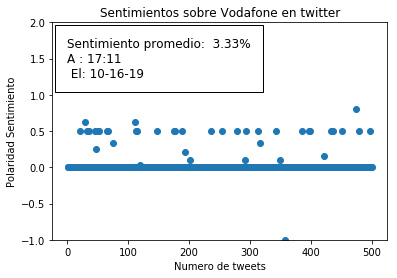

In [42]:
GraficarDatos(numeros_list,polaridad_list,numero)